Objective: To builed a model to find Hot leads(Leads with very high chance of conversion) using logistic regression and to find important factors to be consider while determining a lead as 'Hot lead'.

# Reading and Understanding the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
# Importing all datasets
Lead= pd.read_csv("Leads.csv")
Lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
Lead.shape

(9240, 37)

In [5]:
Lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

Obsetvations:
- The data has 9240 rows.
- The data has 37 columns out of which 7 are numeric and the rest are object type.
- Some of the columns have missing data point.

# Data Cleaning:

In [7]:
Lead.drop(['Last Notable Activity','I agree to pay the amount through cheque','Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Number'],axis=1,inplace=True)

Explanation:
- The columns 'Prospect ID','Asymmetrique Activity Index','Asymmetrique Profile Index','Lead Number' are dropped because they are index values and plays no role in the data analysis.
- The columns 'Last Notable Activity','I agree to pay the amount through cheque' are dropped because logically they do not help in determing the strength of the Lead.

In [8]:
Lead.shape

(9240, 31)

In [9]:
Lead.isna().sum().sort_values(ascending=False)

Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Tags                                             3353
Lead Profile                                     2709
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
How did you hear about X Education               2207
Specialization                                   1438
City                                             1420
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Lead Origin                                         0
Get updates on DM Content                           0
Through Recommendations     

In [10]:
Lead['Specialization'].value_counts()

Specialization
Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: count, dtype: int64

Observation:
- We can see here that the column 'Specialization' has the value 'Select' which is acutually a null value because while filling online forms the default value is 'select' and if the customer does not fill a question then the value remains as 'select'. Thus 'Select' is essentially a null value.
- The questions also mentions the several columns in this dataframe contain 'Select' value. Thus we need to replace 'Select' with a null value to perform the analysis correctly.

In [11]:
Lead=Lead.replace('Select', np.nan)

In [12]:
Lead.isna().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Update me on Supply Chain Content                   0
Lead Origin                                         0
Get updates on DM Content                           0
Through Recommendations     

In [13]:
#Measuring the % of null values:
round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

Observations:
- for columns 'How did you hear about X Education' and 'Lead Profile' over 70% of the data is missing so we have to drop thses columns inorder not to skew the results
- for columns 'Tags' and 'Specialization' seem to be important columns and could logically be related to identifying potential leads but close to 40% of the datas are missing and since there are only 9240 data points it is better if we drop these column as well as there is no way to find the missing data .
- for column 'City' also close to 40% data is missing but this category is not potentially important while considering potential leads even if there is a correlation it might be a co-incidence.Simililarly the column 'Country' can also be dropped because it is logically not an important factor and close to 30% of the data points are missing.
- for column 'Asymmetrique Profile Score' and 'Asymmetrique Activity Score' also close to 45% of the data is missing and there is no way to find this score (guessing the value would only skew the analysis), considering there are only 9000 data points these values have to be dropped.
- 'Lead quality' is an important column but from the data dictionary it is understood that this column is based on the employee's intution so it is better to drop this colummn considering the percentage of missing values.
- for columns 'What is your current occupation', 'What matters most to you in choosing a course' close to 30% of the data is missing, these columns could logically help in finding potential leads as people's preference with respect to a course and their current occupation could influence how motivated they are about learning an online course but there are only 9240 data points and if we impute 30% of the data and only build a model with the rest the model could be overfitted, to avoid that we should drop these columns as there is no way to find the values of these columns.

In [14]:
#Dropping the columns with large number of missing datas:

In [15]:
Lead.drop(['How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score','City','Specialization','Tags','What matters most to you in choosing a course','What is your current occupation','Country'],axis=1,inplace=True)

In [16]:
Lead.shape

(9240, 20)

In [17]:
Lead.isna().sum().sort_values(ascending=False)

TotalVisits                               137
Page Views Per Visit                      137
Last Activity                             103
Lead Source                                36
Lead Origin                                 0
X Education Forums                          0
Get updates on DM Content                   0
Update me on Supply Chain Content           0
Receive More Updates About Our Courses      0
Through Recommendations                     0
Digital Advertisement                       0
Newspaper                                   0
Magazine                                    0
Newspaper Article                           0
Search                                      0
Total Time Spent on Website                 0
Converted                                   0
Do Not Call                                 0
Do Not Email                                0
A free copy of Mastering The Interview      0
dtype: int64

In [18]:
round(100*(Lead.isnull().sum()/len(Lead.index)), 2)

Lead Origin                               0.00
Lead Source                               0.39
Do Not Email                              0.00
Do Not Call                               0.00
Converted                                 0.00
TotalVisits                               1.48
Total Time Spent on Website               0.00
Page Views Per Visit                      1.48
Last Activity                             1.11
Search                                    0.00
Magazine                                  0.00
Newspaper Article                         0.00
X Education Forums                        0.00
Newspaper                                 0.00
Digital Advertisement                     0.00
Through Recommendations                   0.00
Receive More Updates About Our Courses    0.00
Update me on Supply Chain Content         0.00
Get updates on DM Content                 0.00
A free copy of Mastering The Interview    0.00
dtype: float64

- The remaining columns have very less missing datas so instead of dropping the entire columns we could just drop the missing rows.

In [19]:
# Dropping the missing rows:

In [20]:
Lead=Lead[~(Lead['TotalVisits'].isna())]

In [21]:
Lead.isna().sum().sort_values(ascending=False)

Lead Source                               29
Lead Origin                                0
Get updates on DM Content                  0
Update me on Supply Chain Content          0
Receive More Updates About Our Courses     0
Through Recommendations                    0
Digital Advertisement                      0
Newspaper                                  0
X Education Forums                         0
Newspaper Article                          0
Magazine                                   0
Search                                     0
Last Activity                              0
Page Views Per Visit                       0
Total Time Spent on Website                0
TotalVisits                                0
Converted                                  0
Do Not Call                                0
Do Not Email                               0
A free copy of Mastering The Interview     0
dtype: int64

In [22]:
Lead=Lead[~(Lead['Lead Source'].isna())]

In [23]:
Lead.isna().sum().sort_values(ascending=False)

Lead Origin                               0
Lead Source                               0
Get updates on DM Content                 0
Update me on Supply Chain Content         0
Receive More Updates About Our Courses    0
Through Recommendations                   0
Digital Advertisement                     0
Newspaper                                 0
X Education Forums                        0
Newspaper Article                         0
Magazine                                  0
Search                                    0
Last Activity                             0
Page Views Per Visit                      0
Total Time Spent on Website               0
TotalVisits                               0
Converted                                 0
Do Not Call                               0
Do Not Email                              0
A free copy of Mastering The Interview    0
dtype: int64

In [24]:
Lead.shape

(9074, 20)

In [25]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9074 non-null   object 
 1   Lead Source                             9074 non-null   object 
 2   Do Not Email                            9074 non-null   object 
 3   Do Not Call                             9074 non-null   object 
 4   Converted                               9074 non-null   int64  
 5   TotalVisits                             9074 non-null   float64
 6   Total Time Spent on Website             9074 non-null   int64  
 7   Page Views Per Visit                    9074 non-null   float64
 8   Last Activity                           9074 non-null   object 
 9   Search                                  9074 non-null   object 
 10  Magazine                                9074 non-null   object 
 

Now that all the missing values have been imputed and all the datas are in the acceptable format, we can start Data visualization.

# Data Visualization:

In [26]:
# Vizualization of Categorical data:

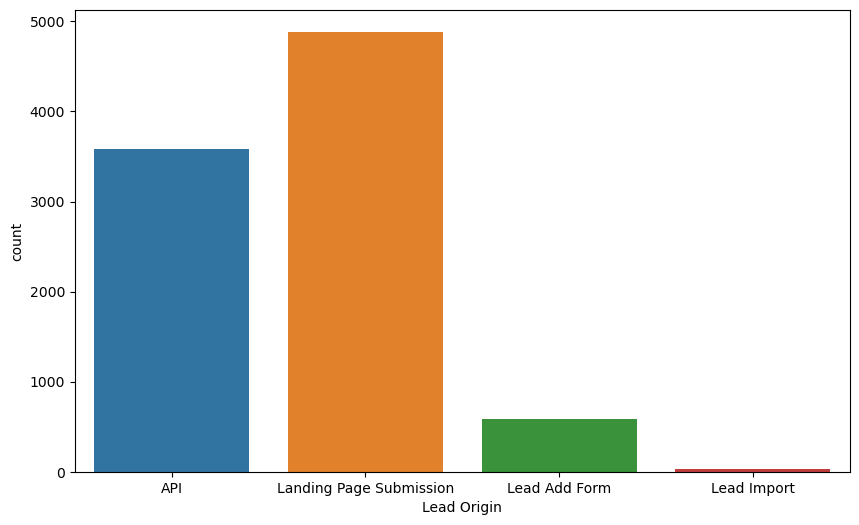

In [27]:
plt.figure(figsize=(10,6))
sns.countplot(x='Lead Origin',data=Lead)
plt.show()

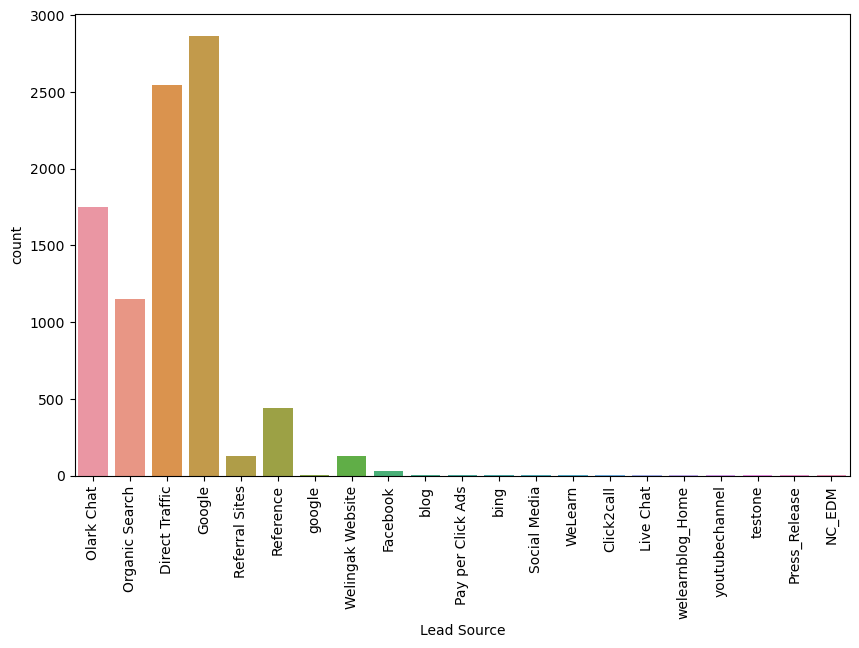

In [28]:
plt.figure(figsize=(10,6))
sns.countplot(x='Lead Source',data=Lead)
plt.xticks(rotation=90)
plt.show()

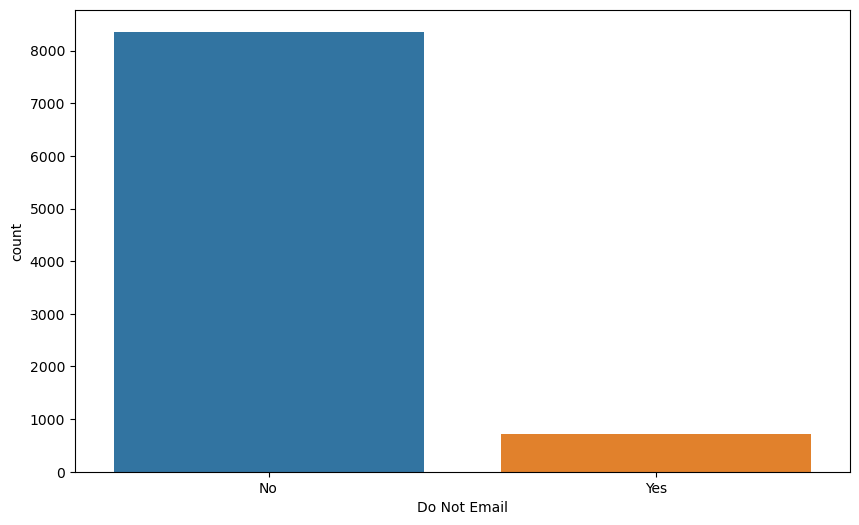

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(x='Do Not Email',data=Lead)
plt.show()

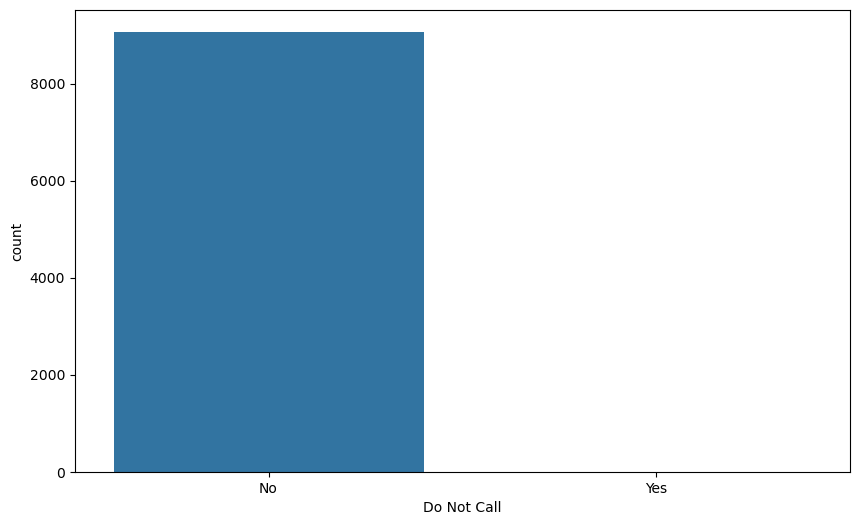

In [30]:
plt.figure(figsize=(10,6))
sns.countplot(x='Do Not Call',data=Lead)
plt.show()

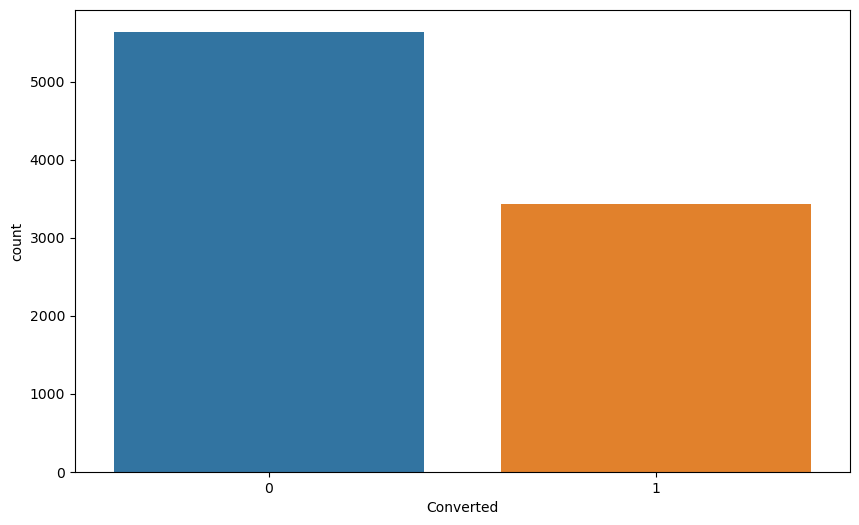

In [31]:
plt.figure(figsize=(10,6))
sns.countplot(x='Converted',data=Lead)
plt.show()

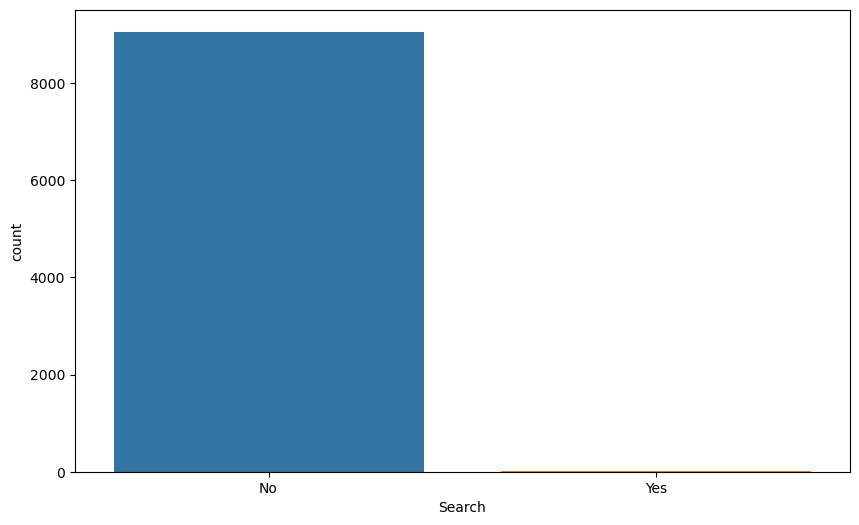

In [32]:
plt.figure(figsize=(10,6))
sns.countplot(x='Search',data=Lead)
plt.show()

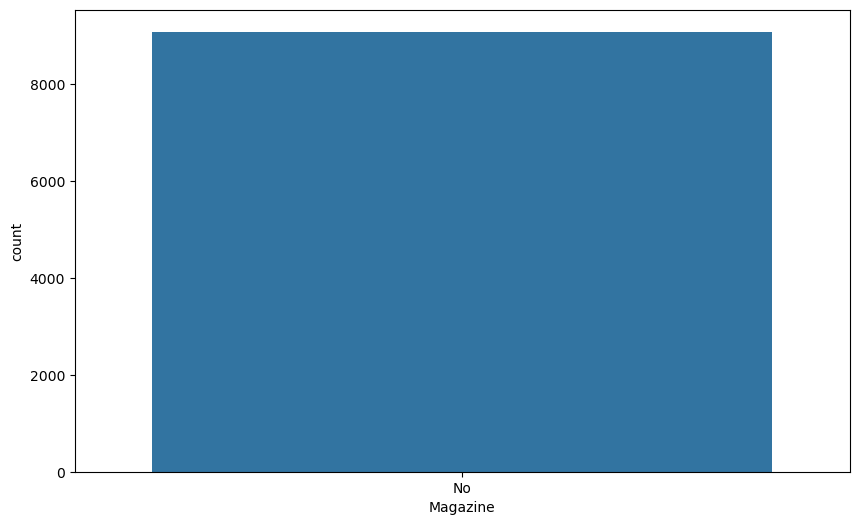

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='Magazine',data=Lead)
plt.show()

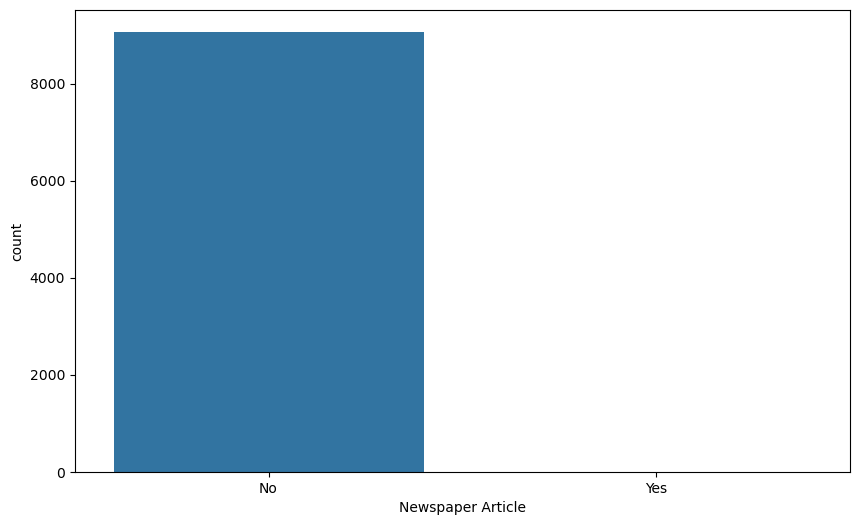

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Newspaper Article',data=Lead)
plt.show()

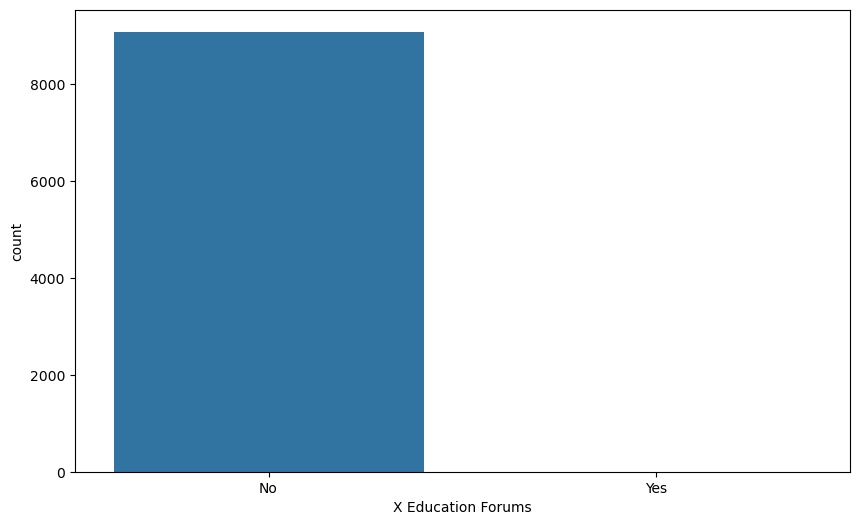

In [35]:
plt.figure(figsize=(10,6))
sns.countplot(x='X Education Forums',data=Lead)
plt.show()

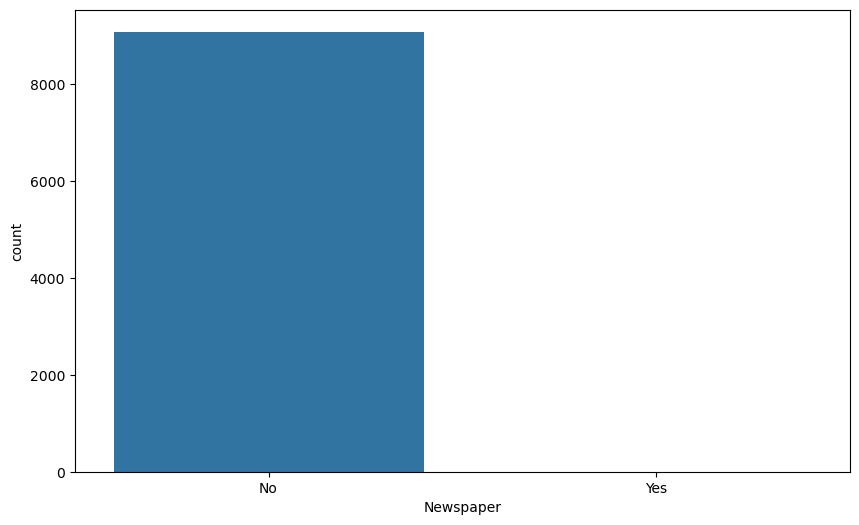

In [36]:
plt.figure(figsize=(10,6))
sns.countplot(x='Newspaper',data=Lead)
plt.show()

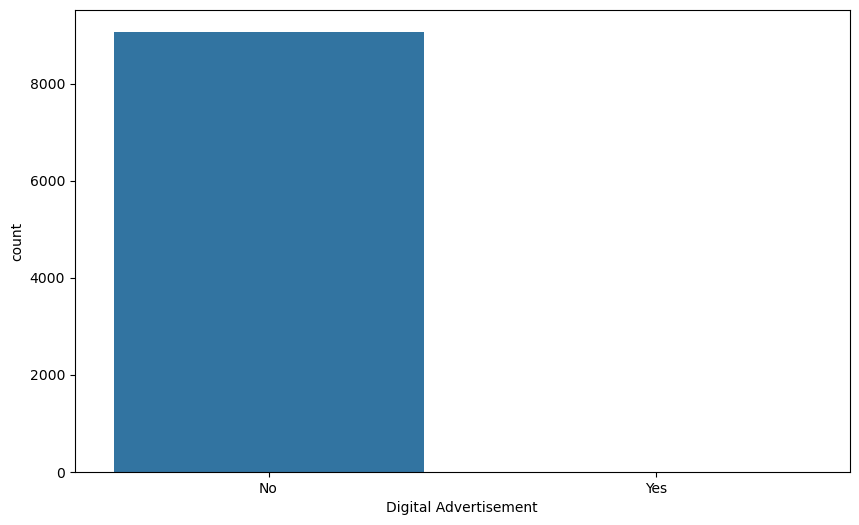

In [37]:
plt.figure(figsize=(10,6))
sns.countplot(x='Digital Advertisement',data=Lead)
plt.show()

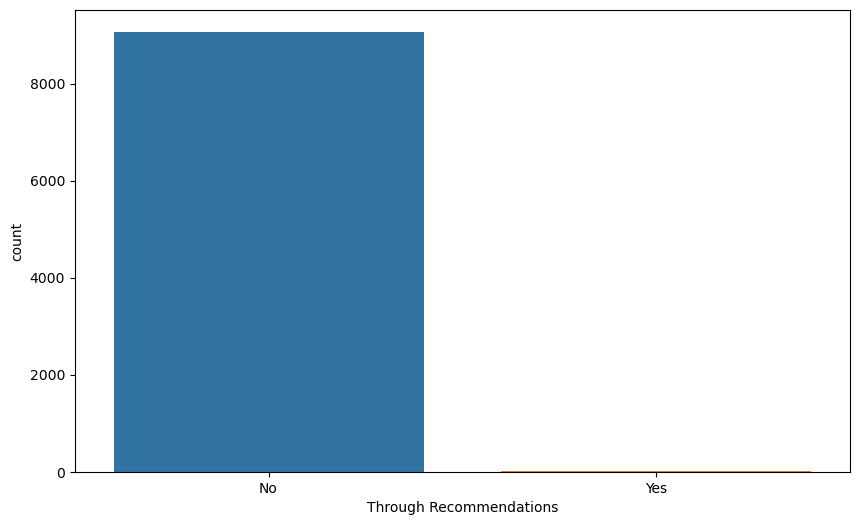

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Through Recommendations',data=Lead)
plt.show()

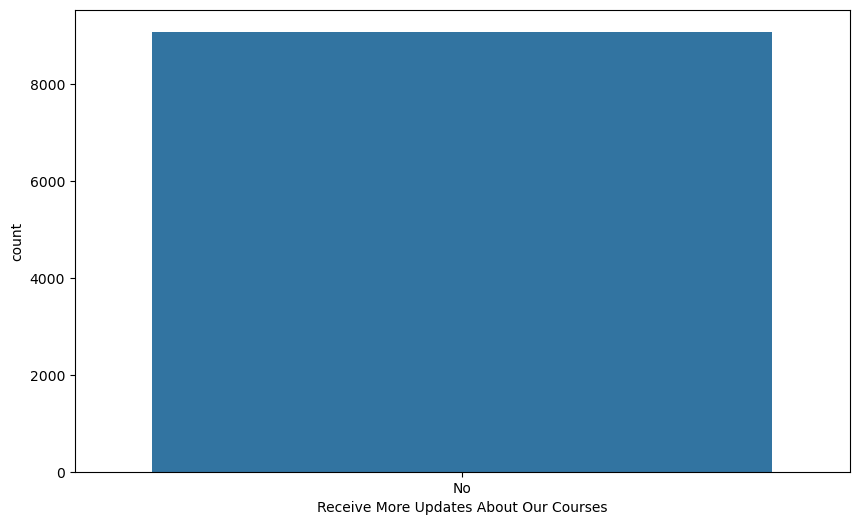

In [39]:
plt.figure(figsize=(10,6))
sns.countplot(x='Receive More Updates About Our Courses',data=Lead)
plt.show()

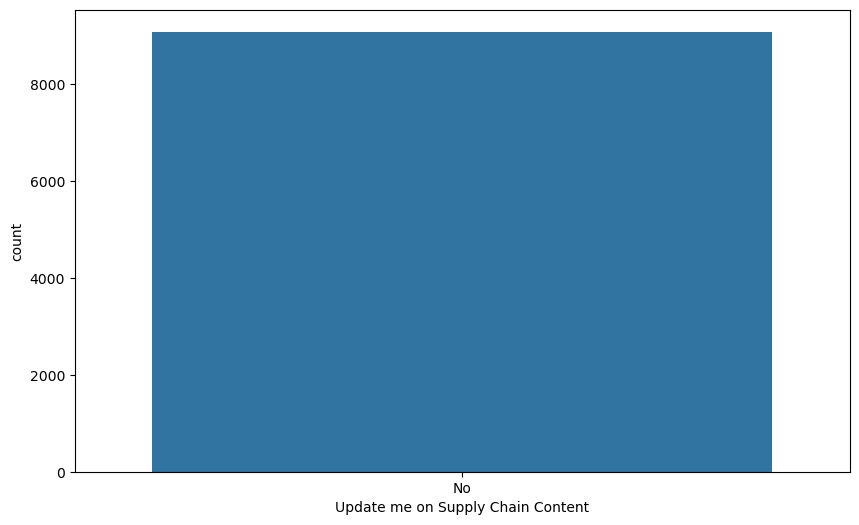

In [40]:
plt.figure(figsize=(10,6))
sns.countplot(x='Update me on Supply Chain Content',data=Lead)
plt.show()

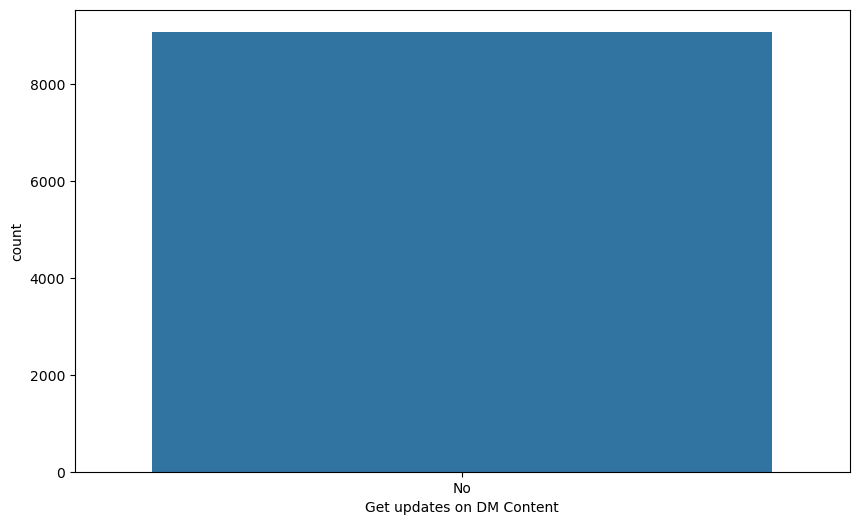

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='Get updates on DM Content',data=Lead)
plt.show()

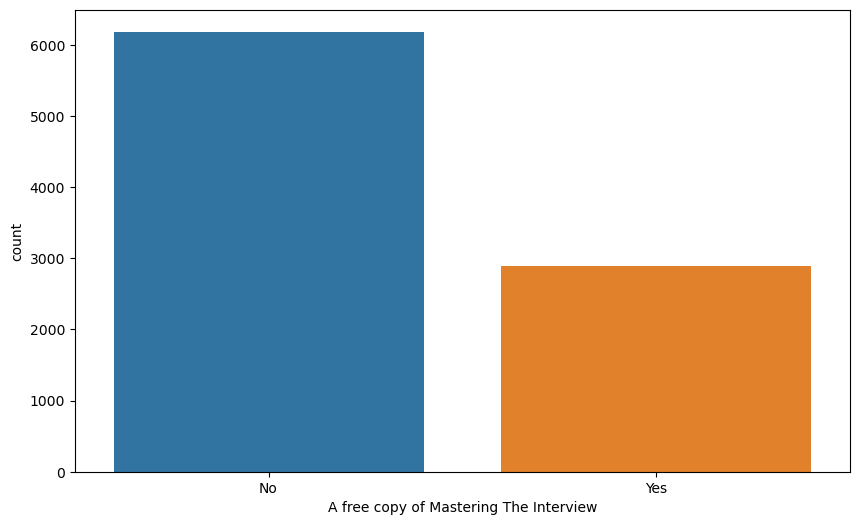

In [42]:
plt.figure(figsize=(10,6))
sns.countplot(x='A free copy of Mastering The Interview',data=Lead)
plt.show()

Observation: 
- Columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content','Get updates on DM Content' has only one value so they could be dropped since they don't impact the analysis.
- Columns 'Do Not Call', 'Search', 'Through Recommendations' etc... have single value for over 95% of its data points.(That is why some of the graps have almost no values in one of their categories).They can be imputed using Variency Threshold. 

In [43]:
#Dropping columns with only one value:
Lead.drop(['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content'],axis=1,inplace=True)

In [44]:
Lead.shape

(9074, 16)

In [45]:
# Vizualization of Numeric Data:

<Figure size 2000x2000 with 0 Axes>

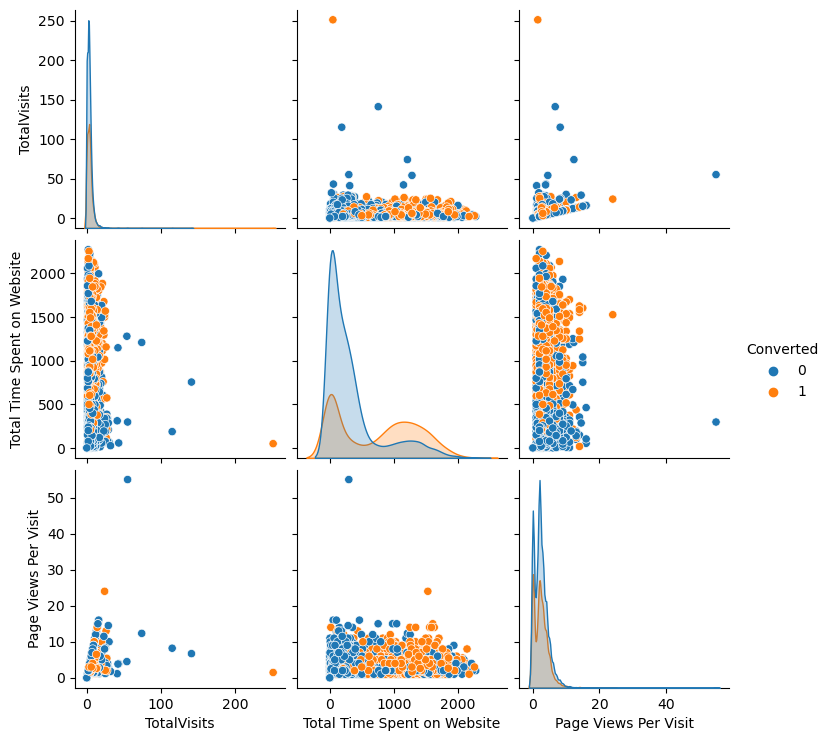

In [46]:
# Creating pairplot of all numeric variables

plt.figure(figsize=[20,20])
sns.pairplot(Lead.select_dtypes(include= ['int64','float64']), hue='Converted', diag_kind= 'kde')
plt.show()

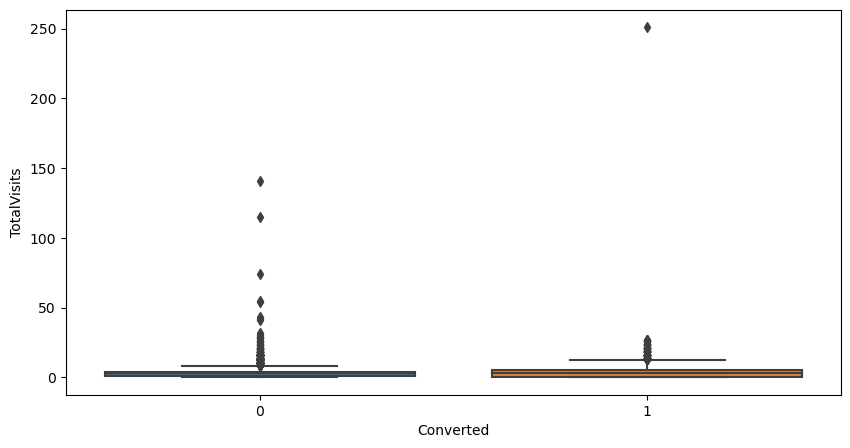

In [47]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = Lead)
plt.show()

- One outlier value present for the column 'Total Visits', that value could potentially skew the data hence we have to remove that datapoint.

In [48]:
#imputing outlier
Lead=Lead[(Lead['TotalVisits']<100)]

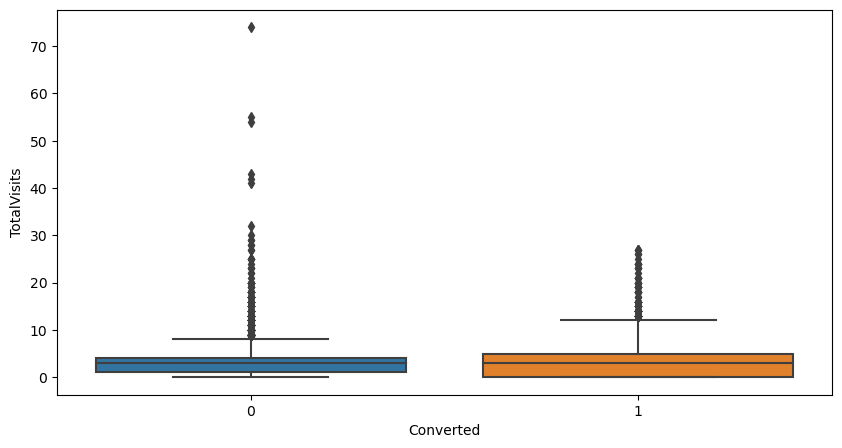

In [49]:
#Vizualization of data after removing outlier:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Converted', y = 'TotalVisits', data = Lead)
plt.show()

- Rest of the outlier points are continuous and closely placed so we can keep those data points.

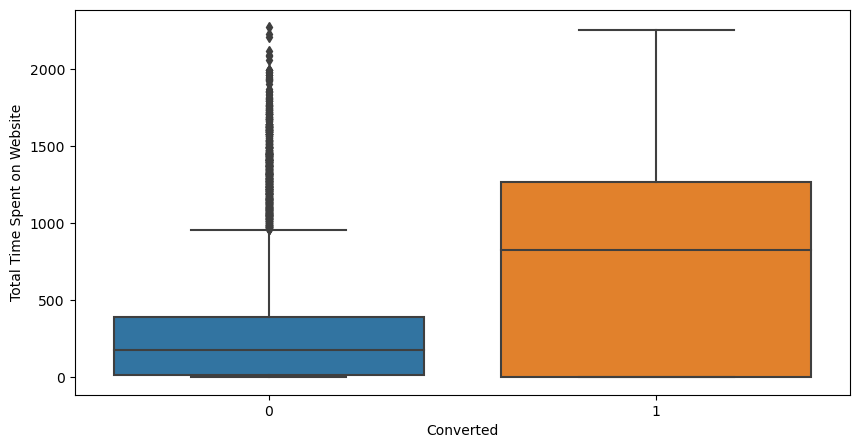

In [50]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Converted', y = 'Total Time Spent on Website', data = Lead)
plt.show()

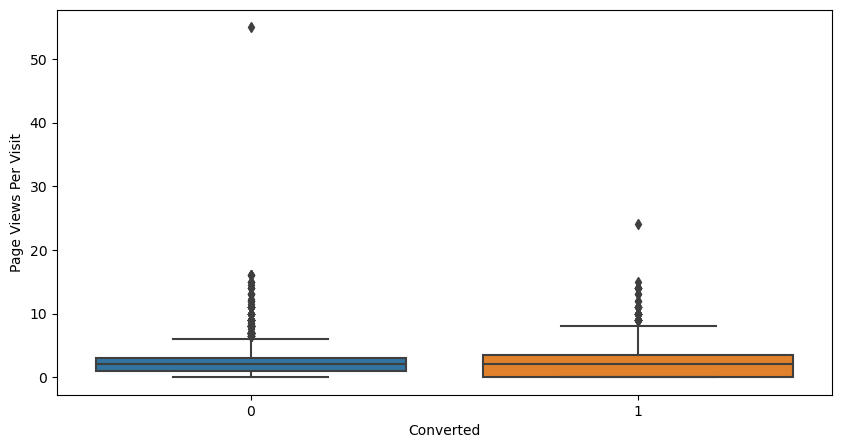

In [51]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = Lead)
plt.show()

- 'Pages viewed per visit' also has two outlier points that could potentially skew the result so we are removing them, the other outliers of the column are continuous so they will not skew the data

In [52]:
#imputing outlier
Lead=Lead[(Lead['Page Views Per Visit']<20)]

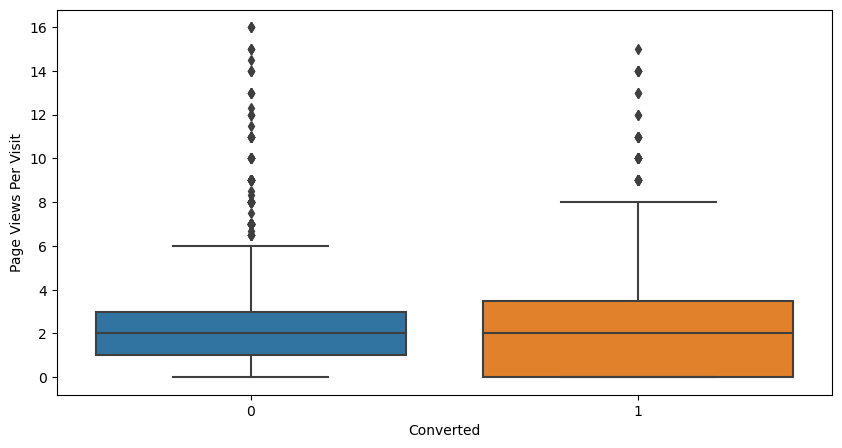

In [53]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'Converted', y = 'Page Views Per Visit', data = Lead)
plt.show()

### Converting all binary values to 0 and 1:

In [54]:
# List of variables to map

varlist =  ['Do Not Email', 'Do Not Call','Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the housing list
Lead[varlist] = Lead[varlist].apply(binary_map)

In [55]:
Lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,0
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,1
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,0
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,0


### Creating Dummy variables:

In [56]:
Lead['Lead Origin'].value_counts()

Lead Origin
Landing Page Submission    4881
API                        3577
Lead Add Form               581
Lead Import                  30
Name: count, dtype: int64

In [57]:

status_1= pd.get_dummies(Lead[['Lead Origin','Lead Source','Last Activity']], drop_first = True)
Lead = pd.concat([Lead, status_1], axis = 1)

In [58]:
Lead.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,0,...,False,False,False,True,False,False,False,False,False,False
1,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,0,...,False,False,False,False,False,False,False,False,False,False
2,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,0,...,False,False,False,False,False,False,False,False,False,False
3,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,0,...,False,False,False,False,False,False,True,False,False,False
4,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,0,...,False,False,False,False,False,False,False,False,False,False


In [59]:
Lead.drop(['Lead Origin','Lead Source','Last Activity'],axis=1,inplace=True)

In [60]:
Lead.head()

,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,...,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow
0,0,0,0,0.0,0,0.0,0,0,0,0,...,False,False,False,True,False,False,False,False,False,False
1,0,0,0,5.0,674,2.5,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2,0,0,1,2.0,1532,2.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
3,0,0,0,1.0,305,1.0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
4,0,0,1,2.0,1428,1.0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [61]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9069 entries, 0 to 9239
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Do Not Email                                9069 non-null   int64  
 1   Do Not Call                                 9069 non-null   int64  
 2   Converted                                   9069 non-null   int64  
 3   TotalVisits                                 9069 non-null   float64
 4   Total Time Spent on Website                 9069 non-null   int64  
 5   Page Views Per Visit                        9069 non-null   float64
 6   Search                                      9069 non-null   int64  
 7   Newspaper Article                           9069 non-null   int64  
 8   X Education Forums                          9069 non-null   int64  
 9   Newspaper                                   9069 non-null   int64  
 10  Digital Advertise

In [62]:
Lead = Lead.reset_index(drop=True)

In [63]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Do Not Email                                9069 non-null   int64  
 1   Do Not Call                                 9069 non-null   int64  
 2   Converted                                   9069 non-null   int64  
 3   TotalVisits                                 9069 non-null   float64
 4   Total Time Spent on Website                 9069 non-null   int64  
 5   Page Views Per Visit                        9069 non-null   float64
 6   Search                                      9069 non-null   int64  
 7   Newspaper Article                           9069 non-null   int64  
 8   X Education Forums                          9069 non-null   int64  
 9   Newspaper                                   9069 non-null   int64  
 10  Digital Adve

In [64]:
# List of variables to map

varlist = ['Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import', 'Lead Source_Direct Traffic', 'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat', 'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release', 'Lead Source_Reference', 'Lead Source_Referral Sites', 'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_Welingak Website', 'Lead Source_bing', 'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone', 'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel', 'Last Activity_Converted to Lead', 'Last Activity_Email Bounced', 'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam', 'Last Activity_Email Opened', 'Last Activity_Email Received', 'Last Activity_Form Submitted on Website', 'Last Activity_Had a Phone Conversation', 'Last Activity_Olark Chat Conversation', 'Last Activity_Page Visited on Website', 'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent', 'Last Activity_Unreachable', 'Last Activity_Unsubscribed', 'Last Activity_View in browser link Clicked', 'Last Activity_Visited Booth in Tradeshow']

# Defining the map function
def binary_map(x):
    return x.map({True: 1, False: 0})

# Applying the function to the housing list
Lead[varlist] = Lead[varlist].apply(binary_map)

In [65]:
Lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9069 entries, 0 to 9068
Data columns (total 52 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Do Not Email                                9069 non-null   int64  
 1   Do Not Call                                 9069 non-null   int64  
 2   Converted                                   9069 non-null   int64  
 3   TotalVisits                                 9069 non-null   float64
 4   Total Time Spent on Website                 9069 non-null   int64  
 5   Page Views Per Visit                        9069 non-null   float64
 6   Search                                      9069 non-null   int64  
 7   Newspaper Article                           9069 non-null   int64  
 8   X Education Forums                          9069 non-null   int64  
 9   Newspaper                                   9069 non-null   int64  
 10  Digital Adve

### Performing Variance Thresholding: 

Explanation: 
 A VarianceThreshold object named var_t is created with a threshold value of 0.001(minimum variance a feature must have to be retained) Features with variances below this threshold are considered to have low variance. object var_t is then fitted to the dataset lead and each feature's variance is calculated, and the feature is marked for removal if its variance is below the specified threshold.

Reason for Performing this Step:
Variance thresholding helps find features that hardly change in data(In data vizualization we mentioned such categories: 'Do Not Call', 'Search', 'Through Recommendations' etc...) . Such unchanging features may not be useful and could be removed.

In [66]:
from sklearn.feature_selection import VarianceThreshold

In [67]:
from sklearn.feature_selection import VarianceThreshold
# Performing Variance Thresholding and removing columns having lower variance than threshold

var_t= VarianceThreshold(threshold= .001)
variance_thresh= var_t.fit(Lead)
col_ind= var_t.get_support()

# Below columns have very low variance
Lead.loc[:, ~col_ind].columns

Index(['Do Not Call', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Source_Live Chat', 'Lead Source_NC_EDM',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Social Media', 'Lead Source_WeLearn', 'Lead Source_bing',
       'Lead Source_blog', 'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Email Marked Spam', 'Last Activity_Email Received',
       'Last Activity_Resubscribed to emails',
       'Last Activity_View in browser link Clicked',
       'Last Activity_Visited Booth in Tradeshow'],
      dtype='object')

In [68]:
# Removing above columns from train and test dataset

Lead= Lead.loc[:, col_ind]

In [69]:
Lead.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
0,0,0,0.0,0,0.0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,2.0,1532,2.0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,1,2.0,1428,1.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


### Heat Map:

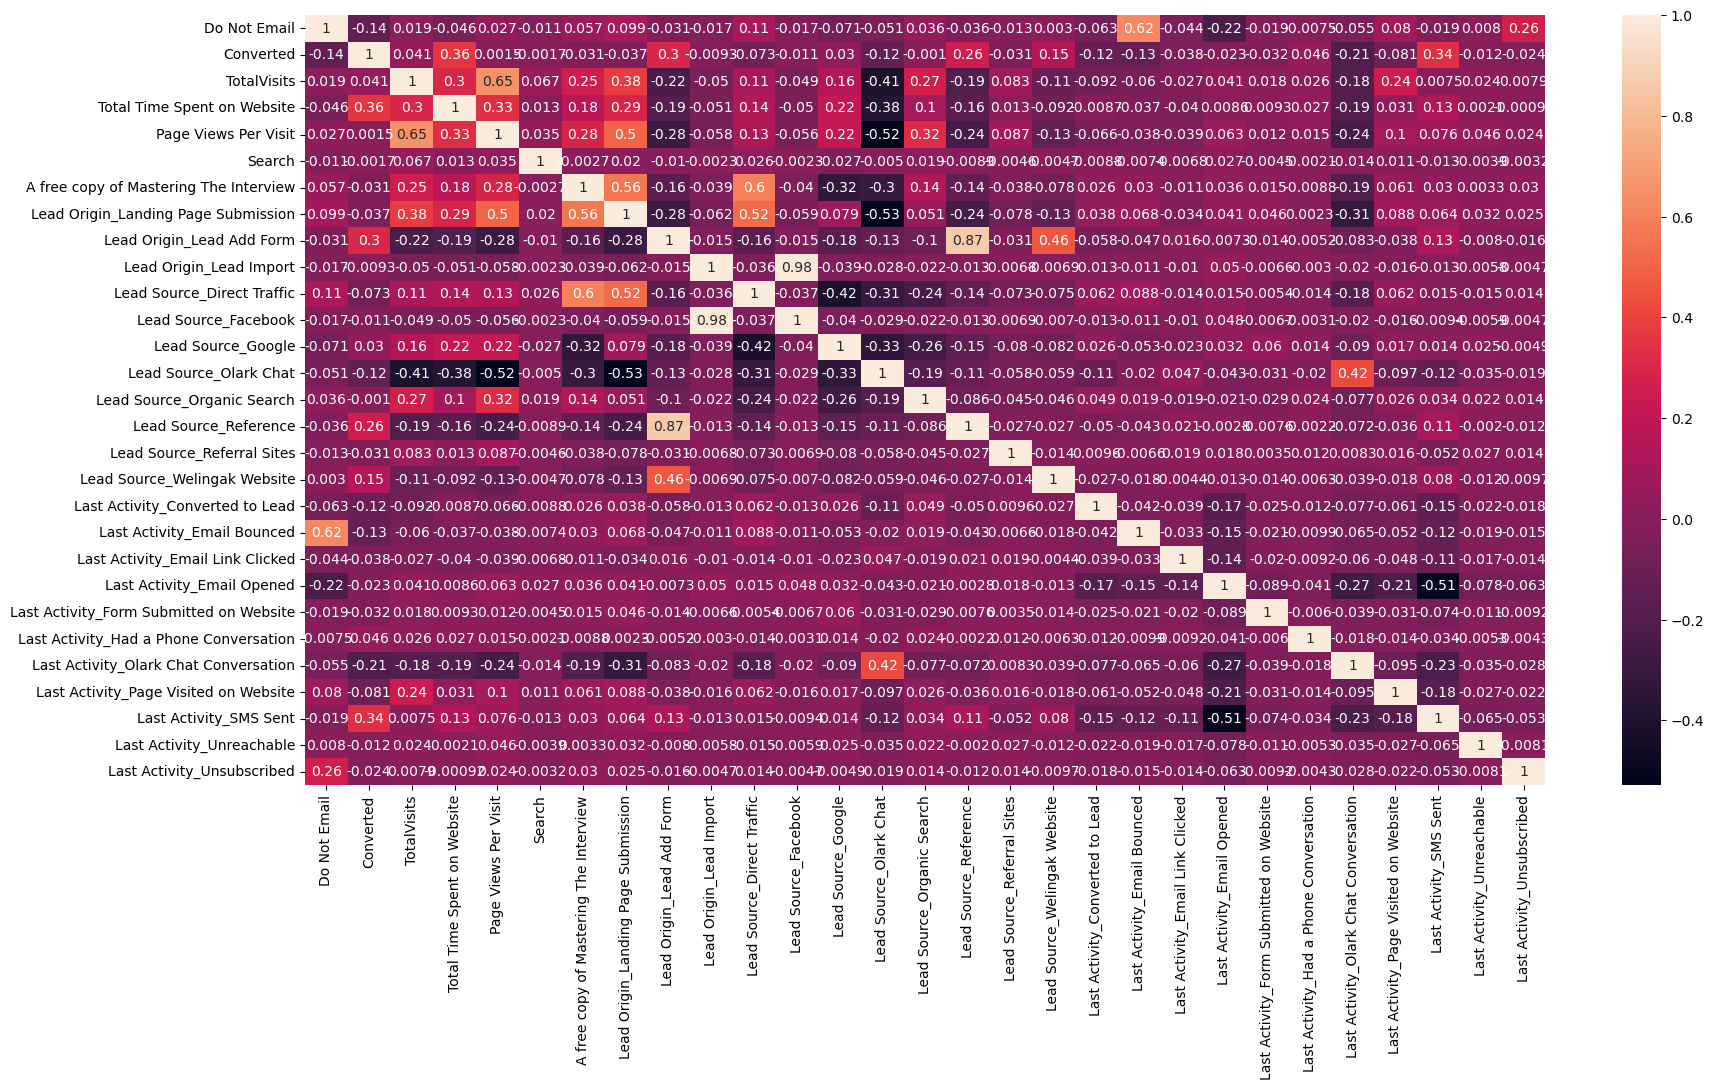

In [70]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(Lead.corr(),annot = True)
plt.show()

Observations:
- According to the hearmap after performing the Variance Thresholding some columns have moderate positive and moderate negative correlations beween them.
- For example: Last Activity_SMS Sent and Last Activity_Email Opened has moderate negative correlation. Similarly Last Avtivity-Email Bounced and Do Not Email has moderate positive correlation.
- Our Target Variable 'Converted' has weak positive correlation with few variables.

# Dividing the data into test-train split:

In [71]:
df_train, df_test = train_test_split(Lead, train_size = 0.7, test_size = 0.3, random_state = 100)

In [72]:
print(df_train.shape)
print(df_test.shape)

(6348, 29)
(2721, 29)


In [73]:
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
5061,0,0,5.0,44,2.5,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5055,1,0,0.0,0,0.0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8167,0,0,3.0,176,3.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1197,0,0,2.0,1497,2.0,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1374,0,0,2.0,1288,2.0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


# Scaling the Numeric Variables:
- Scaling the numeric variables using the MinMaxScaler so that while working with categorical variables the results won't be skewed.

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
scaler = MinMaxScaler()

In [76]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [77]:
df_train.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
5061,0,0,0.092593,0.019366,0.15625,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
5055,1,0,0.000000,0.000000,0.00000,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
8167,0,0,0.055556,0.077465,0.18750,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1197,0,0,0.037037,0.658891,0.12500,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1374,0,0,0.037037,0.566901,0.12500,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


Scaling the test variables:
- Here the variables are scaled according to the train dataset so we are using 'scaler.transform' insted of using 'scaler.fit_transform'.

In [78]:
num_vars = ['TotalVisits','Total Time Spent on Website','Page Views Per Visit']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [79]:
df_test.head()

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,...,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed
7673,0,0,0.018519,0.081866,0.0625,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8961,0,0,0.037037,0.237236,0.1250,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
689,0,1,0.037037,0.531690,0.1250,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
6435,0,0,0.074074,0.158011,0.1250,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6418,0,1,0.092593,0.467430,0.3125,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


#### Dividing into X and Y sets for the model building:

In [80]:
y_train = df_train.pop('Converted')
X_train = df_train

In [81]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [82]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [83]:
# Top 15 Categorical variables:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 2),
 ('Search', False, 13),
 ('A free copy of Mastering The Interview', False, 14),
 ('Lead Origin_Landing Page Submission', False, 9),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Direct Traffic', False, 6),
 ('Lead Source_Facebook', False, 10),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 7),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 4),
 ('Last Activity_Email Opened', False, 12),
 ('Last Activity_Form Submitted on Website', False, 3),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversatio

In [84]:
col = X_train.columns[rfe.support_]

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2854.4
Date:                Tue, 21 May 2024   Deviance:                       5708.7
Time:                        22:51:38   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3483
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3932      0.088    -27.057      0.000      -2.567      -2.220
Do Not Email                              -1.5383      0.207     -7.425      0.000      -1.944      -1.132
TotalVisits                                2.4919      0.579      4.306      0.000       1.358       3.626
Total Time Spent on Website                4.8243      0.164     29.506      0.000       4.504       5.145
Lead Origin_Lead Add Form                  2.2169      1.151      1.927      0.054      -0.038       4.472
Lead Origin_Lead Import                    1.6440      0.440      3.733      0.000       0.781       2.507
Lead Source_Olark Chat                     1.3654      0.109     12.559      0.000       1.152       1.578
Lead Source_Reference                      2.2154      1.171      1.891      0.059      -0.080       4.511
Lead Source_Welingak Website               3.6379      1.361      2.673      0.008       0.970       6.306
Last Activity_Converted to Lead           -0.9534      0.202     -4.720      0.000      -1.349      -0.557
Last Activity_Email Bounced               -0.5689      0.375     -1.515      0.130      -1.305       0.167
Last Activity_Had a Phone Conversation     1.8277      0.592      3.090      0.002       0.668       2.987
Last Activity_Olark Chat Conversation     -1.5912      0.158    -10.048      0.000      -1.902      -1.281
Last Activity_Page Visited on Website     -0.6487      0.144     -4.507      0.000      -0.931      -0.367
Last Activity_SMS Sent                     1.2128      0.075     16.256      0.000       1.067       1.359
Last Activity_Unsubscribed                 1.1271      0.462      2.439      0.015       0.221       2.033
==========================================================================================================
"""

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Lead Origin_Lead Add Form,76.46
7,Lead Source_Reference,59.82
8,Lead Source_Welingak Website,19.59
0,const,6.36
1,Do Not Email,2.01
10,Last Activity_Email Bounced,1.94
6,Lead Source_Olark Chat,1.72
2,TotalVisits,1.47
12,Last Activity_Olark Chat Conversation,1.31
3,Total Time Spent on Website,1.30


Observations:
- VIF value for 'Lead Origin_Lead Add Form' is very high (greater than 5), that means this variable could be explained by other variables. Hence we have to drop this variable. 'P' value for this variable is also high(greater than 0.05).
- 'P' value for 'Last Activity_Email Bounced' is also high but we have to drop the variable one by one.
    

In [87]:
col = col.drop('Lead Origin_Lead Add Form')

In [88]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2856.7
Date:                Tue, 21 May 2024   Deviance:                       5713.3
Time:                        22:51:39   Pearson chi2:                 6.57e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3478
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.3870      0.088    -27.034      0.000      -2.560      -2.214
Do Not Email                              -1.5417      0.207     -7.446      0.000      -1.948      -1.136
TotalVisits                                2.4468      0.578      4.231      0.000       1.313       3.580
Total Time Spent on Website                4.8196      0.163     29.510      0.000       4.499       5.140
Lead Origin_Lead Import                    1.6378      0.440      3.719      0.000       0.775       2.501
Lead Source_Olark Chat                     1.3626      0.109     12.551      0.000       1.150       1.575
Lead Source_Reference                      4.4255      0.235     18.824      0.000       3.965       4.886
Lead Source_Welingak Website               5.8484      0.732      7.993      0.000       4.414       7.282
Last Activity_Converted to Lead           -0.9561      0.202     -4.735      0.000      -1.352      -0.560
Last Activity_Email Bounced               -0.5677      0.375     -1.513      0.130      -1.303       0.168
Last Activity_Had a Phone Conversation     1.8278      0.591      3.090      0.002       0.669       2.987
Last Activity_Olark Chat Conversation     -1.5930      0.158    -10.062      0.000      -1.903      -1.283
Last Activity_Page Visited on Website     -0.6361      0.143     -4.436      0.000      -0.917      -0.355
Last Activity_SMS Sent                     1.2146      0.075     16.284      0.000       1.068       1.361
Last Activity_Unsubscribed                 1.1291      0.462      2.444      0.015       0.224       2.034
==========================================================================================================
"""

In [89]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.36
1,Do Not Email,2.01
9,Last Activity_Email Bounced,1.94
5,Lead Source_Olark Chat,1.71
2,TotalVisits,1.47
11,Last Activity_Olark Chat Conversation,1.31
3,Total Time Spent on Website,1.30
13,Last Activity_SMS Sent,1.24
6,Lead Source_Reference,1.17
12,Last Activity_Page Visited on Website,1.17


Observation:
- VIF value is less than 5 for all categories, so all columns are independent of each other.
- P value of 'Last Activity_Email Bounced' is still greater than 0.05. So we are dropping the column.

In [90]:
col = col.drop('Last Activity_Email Bounced')

In [91]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6348
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.9
Date:                Tue, 21 May 2024   Deviance:                       5715.8
Time:                        22:51:39   Pearson chi2:                 6.55e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3476
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                     -2.4026      0.088    -27.343      0.000      -2.575      -2.230
Do Not Email                              -1.7238      0.173     -9.957      0.000      -2.063      -1.384
TotalVisits                                2.4993      0.578      4.323      0.000       1.366       3.632
Total Time Spent on Website                4.8234      0.163     29.532      0.000       4.503       5.144
Lead Origin_Lead Import                    1.6495      0.441      3.743      0.000       0.786       2.513
Lead Source_Olark Chat                     1.3672      0.109     12.590      0.000       1.154       1.580
Lead Source_Reference                      4.4492      0.235     18.933      0.000       3.989       4.910
Lead Source_Welingak Website               5.8540      0.729      8.031      0.000       4.425       7.283
Last Activity_Converted to Lead           -0.9438      0.202     -4.676      0.000      -1.339      -0.548
Last Activity_Had a Phone Conversation     1.8440      0.594      3.106      0.002       0.680       3.008
Last Activity_Olark Chat Conversation     -1.5816      0.158     -9.995      0.000      -1.892      -1.271
Last Activity_Page Visited on Website     -0.6165      0.143     -4.312      0.000      -0.897      -0.336
Last Activity_SMS Sent                     1.2346      0.074     16.788      0.000       1.091       1.379
Last Activity_Unsubscribed                 1.3070      0.448      2.916      0.004       0.429       2.185
==========================================================================================================
"""

In [92]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,6.19
5,Lead Source_Olark Chat,1.71
2,TotalVisits,1.46
3,Total Time Spent on Website,1.30
10,Last Activity_Olark Chat Conversation,1.29
12,Last Activity_SMS Sent,1.18
6,Lead Source_Reference,1.17
11,Last Activity_Page Visited on Website,1.13
1,Do Not Email,1.10
8,Last Activity_Converted to Lead,1.10


Observation:
- All 'p' values are less than 0.05
- All VIF values are less than 5.

So this is our final model.

# Evaluating the model:

- To Evaluate the model we are going to calculate the confusion matrix, accuracy, sensitivity, specificity, false postive rate, positive predictive value and Negative predictive value.
- Drawing the ROC curve.

Explanations:
- True Positive: The value is correctly predicted as positive.(TP)
- True Negatives: the value is correctly prediced as negative.(TN)
- False Positives: actually negative values are incorrectly predicted as positive(FP)
- False Negatives:actually Positive values are incorrectly predicted as Negative (FN)

Formulas:
Accuracy : (TP+TN)/Total(FP+FN+TP+TN)
Sensitivity/Recall = TP/(TP + FN)
Specificity = TN/(TN + FP)

In [93]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

5061    0.111273
5055    0.059566
8167    0.131229
1197    0.891166
1374    0.604525
2110    0.323659
7460    0.384632
7920    0.963778
4598    0.459584
7274    0.139069
dtype: float64

In [94]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.11127298, 0.05956565, 0.13122922, 0.89116595, 0.60452465,
       0.32365886, 0.38463203, 0.96377785, 0.45958441, 0.13906898])

In [95]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final.index = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob
5061,0,0.111273
5055,0,0.059566
8167,0,0.131229
1197,0,0.891166
1374,0,0.604525


Note: Here we are using 'x > 0.8' because in the question the owner wants conversion rate around 80% so we are only taking leads with very high probability for conversion.

In [96]:
y_train_pred_final['Lead Score']= y_train_pred_final.Converted_Prob.map(lambda x: round(x*100,2))
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score,predicted
5061,0,0.111273,11.13,0
5055,0,0.059566,5.96,0
8167,0,0.131229,13.12,0
1197,0,0.891166,89.12,1
1374,0,0.604525,60.45,0


In [97]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3817  123]
 [1571  837]]


In [98]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.7331442974165091


Note: Accuracy is 73.3% because we have only taken leads with very high probability. so there are more number of false negatives and less number of true positives.

In [99]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [100]:
# Let's see the sensitivity/Recall of our logistic regression model
TP / float(TP+FN)

0.34759136212624586

Recall measure how often the value is predicted yes when it is actually yes.Recall is less because only for variables with probability greater then 80% does the model predict as positive, but the truth is many values even when the probability is less than 80% the value is positive, but for the requirement in this question we have take probability greatern than 80.

In [101]:
# Let us calculate specificity
TN / float(TN+FP)

0.9687817258883249

Note:
Specificity measure how often a value is positive when it is actually predicted positive. For our model specificity is 96.8%, beacuse only when the conversion probability is greatern than 80% the point is predicted positive. Acoording to the question we need a success rate of 80% for this we need a specifivity of only 80% so we can actually go back and reduce the probability requirement of the predicted values.

In [102]:
# Calculate false postive rate - predicting yes when it is actuallu No
print(FP/ float(TN+FP))

0.031218274111675128


In [103]:
# positive predictive value 
print (TP / float(TP+FP))

0.871875


In [104]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7084261321455085


In [105]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [106]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, drop_intermediate = False )

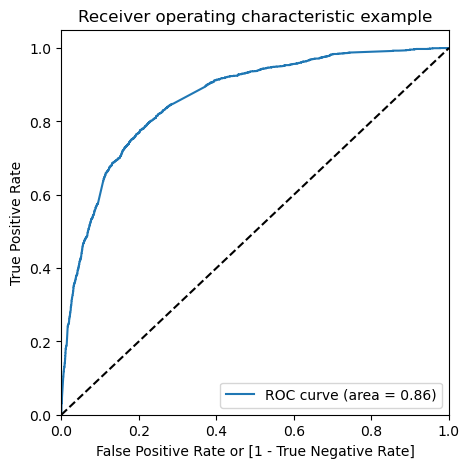

In [107]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

Receiver Operating Characteristic (ROC) Curves is a plot between true positve an false positive rate or sensitivity and specificity. The closer ROC cure is to 1 the better is the value. Here the ROC curve has a value of 0.86

### Additiona Evaluation:

Evaluation conversion at different probability cutoffs:

In [108]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Lead Score,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
5061,0,0.111273,11.13,0,1,1,0,0,0,0,0,0,0,0
5055,0,0.059566,5.96,0,1,0,0,0,0,0,0,0,0,0
8167,0,0.131229,13.12,0,1,1,0,0,0,0,0,0,0,0
1197,0,0.891166,89.12,1,1,1,1,1,1,1,1,1,1,0
1374,0,0.604525,60.45,0,1,1,1,1,1,1,1,0,0,0


In [109]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379332  1.000000  0.000000
0.1   0.1  0.569786  0.975914  0.321574
0.2   0.2  0.707467  0.918189  0.578680
0.3   0.3  0.774102  0.822674  0.744416
0.4   0.4  0.793951  0.742110  0.825635
0.5   0.5  0.798834  0.670266  0.877411
0.6   0.6  0.775362  0.539867  0.919289
0.7   0.7  0.759294  0.453488  0.946193
0.8   0.8  0.733144  0.347591  0.968782
0.9   0.9  0.679269  0.172342  0.989086


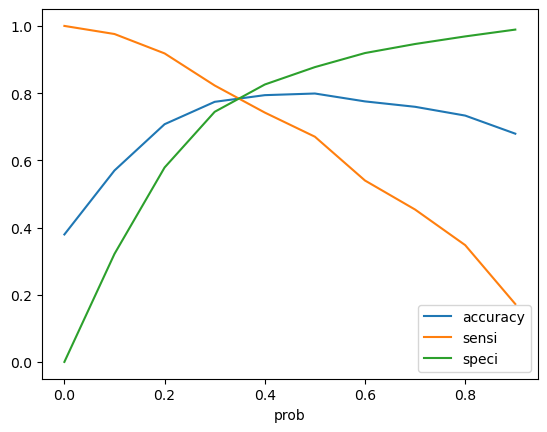

In [110]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [111]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3817,  123],
       [1571,  837]], dtype=int64)

In [112]:
from sklearn.metrics import precision_recall_curve

In [113]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(5061    0
 5055    0
 8167    0
 1197    0
 1374    0
        ..
 350     0
 79      1
 8039    0
 6936    1
 5640    1
 Name: Converted, Length: 6348, dtype: int64,
 5061    0
 5055    0
 8167    0
 1197    1
 1374    0
        ..
 350     0
 79      0
 8039    1
 6936    1
 5640    1
 Name: predicted, Length: 6348, dtype: int64)

In [114]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

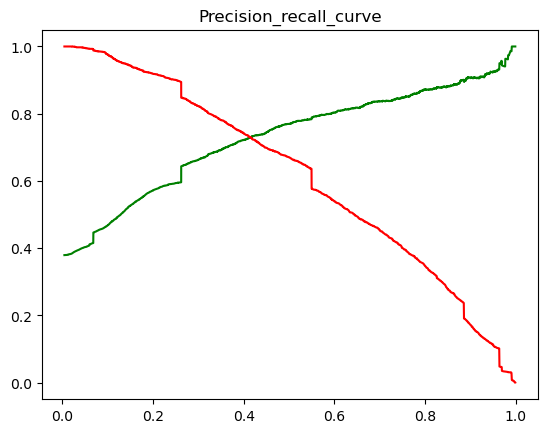

In [115]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title('Precision_recall_curve')
plt.show()

## Evaluating the test data:

In [116]:
y_test = df_test.pop('Converted')
X_test = df_test

In [117]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unsubscribed
7673,0,0.018519,0.081866,0,0,0,0,1,0,0,0,0,0
8961,0,0.037037,0.237236,0,0,0,0,0,0,1,0,0,0
689,0,0.037037,0.531690,0,0,0,0,0,0,0,0,0,0
6435,0,0.074074,0.158011,0,0,0,0,0,0,0,0,0,0
6418,0,0.092593,0.467430,0,0,0,0,0,0,0,0,1,0


In [118]:
X_test_sm = sm.add_constant(X_test)

In [119]:
y_test_pred = res.predict(X_test_sm)

In [120]:
y_test_pred[:10]

7673    0.051896
8961    0.060234
689     0.563287
6435    0.189181
6418    0.788857
1145    0.210906
5567    0.068047
564     0.069438
8154    0.518697
8352    0.032140
dtype: float64

In [121]:
y_pred_1 = pd.DataFrame(y_test_pred)

In [122]:
y_pred_1.head()

,0
7673,0.051896
8961,0.060234
689,0.563287
6435,0.189181
6418,0.788857


In [123]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [124]:
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [125]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [126]:
y_pred_final.head()

,Converted,0
0,0,0.051896
1,0,0.060234
2,1,0.563287
3,0,0.189181
4,1,0.788857


In [127]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [128]:
y_pred_final.head()

,Converted,Converted_Prob
0,0,0.051896
1,0,0.060234
2,1,0.563287
3,0,0.189181
4,1,0.788857


In [129]:
y_pred_final['Lead Score']= y_pred_final.Converted_Prob.map(lambda x: round(x*100,2))
y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.8 else 0)

In [130]:
y_pred_final.head()

,Converted,Converted_Prob,Lead Score,final_predicted
0,0,0.051896,5.19,0
1,0,0.060234,6.02,0
2,1,0.563287,56.33,0
3,0,0.189181,18.92,0
4,1,0.788857,78.89,0


In [131]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.725101065784638

Overall Acuracy is similar to the train data.

In [132]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1626,   70],
       [ 678,  347]], dtype=int64)

In [133]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [134]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.3385365853658537

In [135]:
# Let us calculate specificity
TN / float(TN+FP)

0.9587264150943396

As we can see Both sensitivity and specificity of the test data is very similar to the train data.

In [136]:
# Calculate false postive rate 
print(FP/ float(TN+FP))

0.041273584905660375


In [137]:
# positive predictive value 
print (TP / float(TP+FP))

0.8321342925659473


In [138]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7057291666666666


In [139]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Converted, y_pred_final.Converted_Prob, drop_intermediate = False )

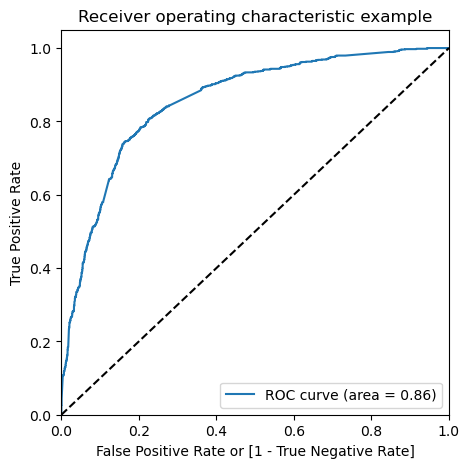

In [140]:
draw_roc(y_pred_final.Converted, y_pred_final.Converted_Prob)

    ROC curve is similar to the ROC cure of the test data.

Conclusion:
Our final model has very high specificity hence the values predicted as true are hot leads as their coversion probability are greater than 80%. Hence the sales team has to mainly focus on customers predicted as positive to increase sales.

Important factors to be consider while determining a lead as 'Hot lead' according to our final model are:
- Do Not Email
- TotalVisits
- Total Time Spent on Website
- Lead Origin_Lead Import
- Lead Source_Olark Chat
- Lead Source_Reference
- Lead Source_Welingak Website
- Last Activity_Converted to Lead
- Last Activity_Had a Phone Conversation
- Last Activity_Olark Chat Conversation
- Last Activity_Page Visited on Website
- Last Activity_SMS Sent
- Last Activity_Unsubscribed